In [36]:
import numpy as np 
import pandas as pd 
import re 
import nltk 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

##  Input: str_arg --> Takes string to clean 
##  Output: cleaned_str --> Gives back cleaned string 
##  This fuction cleans the text in the mentioned ways as comments after the line.This has been copied from some other         kernel.

In [37]:
def preprocess_string(str_arg):
    cleaned_str=re.sub('[^a-z\s]+',' ',str_arg,flags=re.IGNORECASE) #every char except alphabets is replaced
    cleaned_str=re.sub('(\s+)',' ',cleaned_str) #multiple spaces are replaced by single space
    cleaned_str=cleaned_str.lower() #converting the cleaned string to lower case
    
    return cleaned_str # Returning the preprocessed string in tokenized form

##  This code block is for reading and cleaning data.

In [38]:

import_df = pd.read_csv('../input/flipkart-products/flipkart_com-ecommerce_sample.csv')
# Reading relevant data
import_df['product_category_tree'] = import_df['product_category_tree'].apply(lambda x : x.split('>>')[0][2:].strip())
# Category processing. (Check data to understand)
top_fiv_gen = list(import_df.groupby('product_category_tree').count().sort_values(by='uniq_id',ascending=False).head(5).index)
# Taking only top 5 categories for example sake
processed_df = import_df[import_df['product_category_tree'].isin(top_fiv_gen)][['product_category_tree','description']]
# Selecting only relevant columns
processed_df['description'] = processed_df['description'].astype('str').apply(preprocess_string)
# Cleaning strings
cat_list = list(processed_df['product_category_tree'].unique())
# Creating a list of categories for later use
print(cat_list)
# Printing the list of top 5 categories
le = preprocessing.LabelEncoder()
category_encoded=le.fit_transform(processed_df['product_category_tree'])
processed_df['product_category_tree'] = category_encoded
# Encoding the product category

['Clothing', 'Footwear', 'Automotive', 'Mobiles & Accessories', 'Jewellery']


## Data Visualisation

In [39]:
import_df = import_df[ import_df["product_category_tree"].isin(['Clothing','Footwear','Automotive','Mobiles & Accessories','Jewellery']) ][["product_category_tree","description"]]
## rename columns
import_df = import_df.rename(columns={"product_category_tree":"y", "description":"text"})
## print 5 random rows
import_df.sample(5)

,y,text
18673,Clothing,Key Features of Bodycare Checkered Boy's Boxer...
4467,Jewellery,Zaicus Bohemian Tassels Drop Alloy Necklace - ...
12146,Jewellery,Sukkhi Copper Yellow Gold Bangle Set - Buy Suk...
9736,Clothing,Meish Casual Short Sleeve Embellished Women's ...
19557,Clothing,Msons Women's A-line Dress - Buy White Msons W...


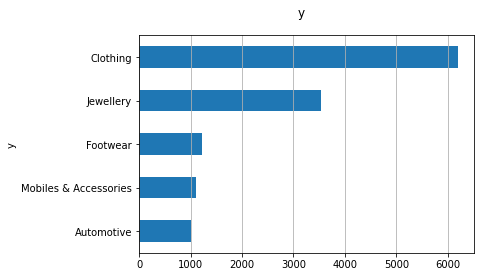

In [40]:
x = "y"
fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
import_df[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

##  This code block is for spliting train test data.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(processed_df['description'],processed_df['product_category_tree'],test_size=0.2)

## This code block is for converting the training data to vectorized form.

In [6]:

vect = CountVectorizer(stop_words = 'english')
# Removing stop words
X_train_matrix = vect.fit_transform(X_train) 
# Converting the train data

## This code block is for training vectorized data and predicting & scoring test data.

In [7]:
clf=MultinomialNB()
# Defining model
clf.fit(X_train_matrix, y_train)
# Fitting to multinomial NB model 
print(clf.score(X_train_matrix, y_train))
# Scoring the trained model (Expected to be above 95 percent)
X_test_matrix = vect.transform(X_test) 
# Converting the test data
print (clf.score(X_test_matrix, y_test))
# Scoring for the test data
predicted_result=clf.predict(X_test_matrix)
print(classification_report(y_test,predicted_result))
# Printing score 

0.9928250263082369
0.9904361132364193
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       1.00      1.00      1.00      1263
           2       0.99      0.98      0.99       262
           3       0.97      1.00      0.99       672
           4       1.00      0.93      0.96       216

    accuracy                           0.99      2614
   macro avg       0.99      0.98      0.99      2614
weighted avg       0.99      0.99      0.99      2614



## This code block is for converting the training data to Tf-Idf form


In [8]:
vectorizer = TfidfVectorizer(stop_words = 'english')
# Removing stop words
X_train_tfidf = vectorizer.fit_transform(X_train)
# Converting the train data

## This code block is for training, predicting & scoring test data


In [9]:
clf2=MultinomialNB()
# Defining model
clf2.fit(X_train_tfidf, y_train)
# Fitting to multinomial NB model 
print(clf2.score(X_train_tfidf, y_train))
# Scoring the trained model (Expected to be above 95 percent)
X_test_tfidf = vectorizer.transform(X_test) 
# Converting the test data
print (clf2.score(X_test_tfidf, y_test))
# Printing score 

0.9932076915717976
0.9827850038255547


##  Testing Block: Test your sting. Replace the 'car' string to test


In [10]:
le.inverse_transform(clf.predict(vect.transform(['car'])))

array(['Automotive'], dtype=object)